# _Fundamentials of Data Analysis Project 2019_

## _Libraries Used_ 

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import axes_style
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

%matplotlib inline

# pp is used when profiling
import pandas_profiling as pp

# Colored is used to add colour to prints
from termcolor import colored

# Used for regression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


<hr>

## _Explore the Data_ 

Once I downloaded the dataset I stored it in a file named tips.csv. I then needed to load that csv file so I can view the contents by using seaborn. 

My first command when receiving a new dataset is to simply print it and get an idea of its structure. From the print below I can see that 244 rows x 8 columns. We can also see that gender, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.

In [2]:
# Read CSV File
tips = sns.load_dataset("tips")

# Print tips CSV
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<hr>

### Peek at the data

In this section I have used the head and tail functions to demonstrate that we can specify how many rows we want to see during the output along with this I have demonstrated that is is possible to select a range in any given column. 

I have checked for missing values or an empty cell as this will need to be corrected in any given data set that requires us to implement machine learning. 

If we find missing values we can do the following : 
    * Use the mean or median to replace the missing value
    * Use a larger negative number such as -999

In [3]:
#check for missing values (Basic True / False responce)
print("Has the data set any missing values ? True or False ? =",tips.isnull().values.any(), "\n")

# View the first two rows of the dataset. We can see the different columns and structure of the CSV file
print(colored("     Display the first two rows of the Tips Data set", "red"))
print(tips.head(2), "\n\n")


# View the last two rows of the dataset. We can see the different columns and structure of the CSV file
# Viewing the tail is a good way to check for CSV file isses. 
print(colored("     Display the last rows of the Tips Data set", "red"))
print(tips.tail(2))

print("\n")

# Below we can see .head(2) for the tips column + See the Shape of the Dataset  
print("The first two position in the tips column are :","\n",tips["tip"].head(2),"\n\n" "The shape of the dataset is : ", tips.shape)

Has the data set any missing values ? True or False ? = False 

     Display the first two rows of the Tips Data set
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3 


     Display the last rows of the Tips Data set
     total_bill   tip     sex smoker   day    time  size
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


The first two position in the tips column are : 
 0    1.01
1    1.66
Name: tip, dtype: float64 

The shape of the dataset is :  (244, 7)


<hr>

### Statistical Summary.

#### 1) Dataframe.describe()
The python "describe" method is a great option to use that will display the median, mean, min, max, standard deviations etc. It is a good idea to to create this as it is easy to view and can indicate any unexpected or surprising distributions in the dataset.<i>(Medium, 2019)</i>

Key things to note : 
        * Average Total_Bill = 19.75
        * Max Total_Bill     = 50.81
        * Min Total_Bill     = 3.07

        * Average Tip        = 2.99 ( or 3 if rounded )
        * Max Tip            = 10
        * Min Tip            = 1
        
        * Average Party Size = 2 - 3 people
        * Max Party Size     = 6 people
        * Min Party Size     = 1
        
        * More men than woman attended the restaurant
        

In [4]:
# Statistical Summary, fillna(0) is used to replaced NaN
print(tips.describe(include="all").fillna(0))

        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique    0.000000    0.000000     2      2    4       2    0.000000
top       0.000000    0.000000  Male     No  Sat  Dinner    0.000000
freq      0.000000    0.000000   157    151   87     176    0.000000
mean     19.785943    2.998279     0      0    0       0    2.569672
std       8.902412    1.383638     0      0    0       0    0.951100
min       3.070000    1.000000     0      0    0       0    1.000000
25%      13.347500    2.000000     0      0    0       0    2.000000
50%      17.795000    2.900000     0      0    0       0    2.000000
75%      24.127500    3.562500     0      0    0       0    3.000000
max      50.810000   10.000000     0      0    0       0    6.000000


<hr>

#### 2) Dataframe.info()

Pandas is a very good option to consider when doing data analysis. Dataframe.info() is used to return information about the tips dataframe including the data types of each column, if it is null and memory usage of the entire data. It comes really handy when doing exploratory analysis of the data.<i>(GeeksforGeeks, 2019)</i>

In [5]:
# Add colour to print statement
print(colored("Check for null values within the dataset \n", "red"))
# Check for any null or missing values, data types etc.
print(tips.info())

Check for null values within the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


<hr>

#### 4) Dataframe.groupby()

<center>I have used the Pandas dataframe.groupby() to split the Tips data set into groups based on some criteria.</center>

##### 4.1
The following groupby function is focused towards the total bill within the dataset and I have used this function to break the data set based on sex, smokers, and time that they attended the restaurant.<i>(GeeksforGeeks, 2019)</i>. Using groupby I can clearly see how much each sex pay towards tips at different times. To finish it off I will output the overall total in relation to total bill.It is clear to see that the output have alot of 0.0 values and this will need to be investigated further and displayed in better formats.

In [6]:
# .fillna(0) is used to replaced NaN as no one had eaten. ((Pandas.pydata.org, 2019))
# .unstack() unstacks the row to columns . Basically it’s a reverse of stacking ((Pandas.pydata.org, 2019))

print(tips.groupby(["sex", "smoker", "day", "time", "size"])["total_bill"].sum().unstack().fillna(0),"\n")

# Total the amount of tips
bill_total = tips.total_bill.sum()

# Sum the total bill 
print("\n Total bill is : ${:.2f}".format(bill_total))

size                           1       2       3       4      5      6
sex    smoker day  time                                               
Male   Yes    Thur Lunch    0.00  152.47   18.71   20.53   0.00   0.00
                   Dinner   0.00    0.00    0.00    0.00   0.00   0.00
              Fri  Lunch    8.58   25.58    0.00    0.00   0.00   0.00
                   Dinner   0.00   89.29    0.00   40.17   0.00   0.00
              Sat  Lunch    0.00    0.00    0.00    0.00   0.00   0.00
                   Dinner   0.00  293.39  123.15  144.93  28.15   0.00
              Sun  Lunch    0.00    0.00    0.00    0.00   0.00   0.00
                   Dinner   0.00  235.39   68.45   57.82  30.46   0.00
       No     Thur Lunch    0.00  244.22   22.82   27.20  41.19  34.30
                   Dinner   0.00    0.00    0.00    0.00   0.00   0.00
              Fri  Lunch    0.00    0.00    0.00    0.00   0.00   0.00
                   Dinner   0.00   34.95    0.00    0.00   0.00   0.00
      

<hr>

##### 4.2
The following groupby function is focused towards the tips within the dataset. I have used a groupby function to break the data set based on sex, smokers, and time that they attended the restaurant.<i>(GeeksforGeeks, 2019)</i> To finish it off I will output the overall total in relation to tips.

In [7]:
# How much did the smokers and non smokers pay towards tips.  
# .fillna(0) is used to replaced NaN as no one had eaten. ((Pandas.pydata.org, 2019))
# .unstack() unstacks the row to columns . Basically it’s a reverse of stacking ((Pandas.pydata.org, 2019))

print(tips.groupby(["sex", "smoker", "day", "time"])["tip"].sum().unstack().fillna(0))

# Total the amount of tips
tip_tot = tips.tip.sum()

print ("\n \n Total tips : ${:.2f}".format(tip_tot))

time                Lunch  Dinner
sex    smoker day                
Male   Yes    Thur  30.58    0.00
              Fri    5.70   16.23
              Sat    0.00   77.74
              Sun    0.00   52.82
       No     Thur  58.83    0.00
              Fri    0.00    5.00
              Sat    0.00  104.21
              Sun    0.00  133.96
Female Yes    Thur  20.93    0.00
              Fri    7.98   10.80
              Sat    0.00   43.03
              Sun    0.00   14.00
       No     Thur  58.49    3.00
              Fri    3.00    3.25
              Sat    0.00   35.42
              Sun    0.00   46.61

 
 Total tips : $731.58


<hr>

##### 4.3
The following groupby function is focused towards sex within the dataset. The output based on sex will display what the combined total bill was and the combined total tip was. I have also checked how much tips was given by those who smoke against those who do not smoke.  



In [8]:
# Groups by the sex column to view the total tips and size of party
print(tips.groupby("sex").sum())

print("\n\nAmount of smokers and non smokers that gave a tip :","\n",tips.groupby(by = ["smoker", "sex"])["tip"].count())
print("\n\nAmount of tips that smokers and non smokers gave :","\n",tips.groupby(by = ["smoker", "sex"])["tip"].sum())


        total_bill     tip  size
sex                             
Male       3256.82  485.07   413
Female     1570.95  246.51   214


Amount of smokers and non smokers that gave a tip : 
 smoker  sex   
Yes     Male      60
        Female    33
No      Male      97
        Female    54
Name: tip, dtype: int64


Amount of tips that smokers and non smokers gave : 
 smoker  sex   
Yes     Male      183.07
        Female     96.74
No      Male      302.00
        Female    149.77
Name: tip, dtype: float64


<hr>

## Statistical Analysis

In [9]:
# Mean / Average  of the tips column
mean_tip = tips["tip"].mean()

# Mean / Average of the total_bill column
mean_total_bill = tips["total_bill"].mean()

# Median of the tips column
median_tip = tips["tip"].median()

# Median of the total_bill column
median_total_bill = tips["total_bill"].median()

# Mode of the tips column
mode_tip = tips["tip"].mode()

# Mode of the total_bill column
mode_total_bill = tips["total_bill"].mode()

# Max tip price
max_tip_price = max(tips["tip"])

# Minimum tip price
min_tip_price = min(tips["tip"])

# Max total tip price
max_total_bill_price = max(tips["total_bill"])

# Minimum total bill price
min_total_price = min(tips["total_bill"])

# Calculate and show statistics
print ("The maximum total bill is   : {:.2f}".format(max_total_bill_price))
print ("The minimum total bill is   : {:.2f}".format(min_total_price),"\n")

print ("The maximum tip is          : {:.2f}".format(max_tip_price))
print ("The minimum tip is          : {:.2f}".format(min_total_price),"\n")
print("Total bill is               :",tips.total_bill.sum())
print ("Total tips                  : {:.2f}".format(tip_tot),"\n\n")

print ("The mean of tip is          : {:.2f}".format(mean_tip))
print ("The mean of total bill is   : {:.2f}".format(mean_total_bill),"\n")

print ("The median of tip is        : {:.2f}".format(median_tip))
print ("The median of total bill is : {:.2f}".format(median_total_bill),"\n")

# Using [0] removed displaying the datatype(float) so it is better when viewingS. 
print ("The mode of tip is          :", (mode_tip[0]))
print ("The mode of total bill is   :", (mode_total_bill[0]))

The maximum total bill is   : 50.81
The minimum total bill is   : 3.07 

The maximum tip is          : 10.00
The minimum tip is          : 3.07 

Total bill is               : 4827.77
Total tips                  : 731.58 


The mean of tip is          : 3.00
The mean of total bill is   : 19.79 

The median of tip is        : 2.90
The median of total bill is : 17.80 

The mode of tip is          : 2.0
The mode of total bill is   : 13.42


### The best day to work?

Saturday is probably the best day to work as the tip count is highest. Overall the tip percentage are around 15% for each day. 

In [10]:
best_day = tips.groupby("day").sum()  # Groupby day and store in variable
best_day.drop("size", inplace =True, axis =1) # Drop the size column from the output
best_day["percent"] = best_day["tip"]/best_day["total_bill"]*100 # Add percent column
print(best_day) # Print result

      total_bill     tip    percent
day                                
Thur     1096.33  171.83  15.673201
Fri       325.88   51.96  15.944519
Sat      1778.40  260.40  14.642375
Sun      1627.16  247.39  15.203791


<hr>

### Profiling Report
For profiling we first need to go to the command line and type python -m pip install pandas-profiling

Profiling is a simple and quick way to explore the dataset and is a better than the previous methods such as .describe() and .info() as these offer a very basic overview and with large datasets profiling is a much better option. Pandas Profiling function extends the pandas DataFrame for quick data analysis. It displays a lot of information with a single line of code. This display is very user friendly as it is displayed like a report that interactive. (Medium, 2019)

In [11]:
# Print the profiling report
pp.ProfileReport(tips)

<hr>

## _Visualise The Data_

Data visualisation is used to serve two purposes, to bring clarity during analysis and to communicate. Visualisation in simple terms is the process of representing data graphically as we try and identify trends and or patterns within a dataset that would otherwise be unclear or difficult to discern. Incorrect visualisation leads to confusion, errors, and abandonment among viewers.<i>(Betterevaluation.org, 2019)<i/>

### _ScatterPlot_

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables. This association is called a correlation <i>(Chartio, 2019).</i>

The following two scatterplots are generated side by side. The first scatterplots seperates based on gender. Earlier I found the mean total bill is 19.78 dollars and from the graphs generated we can see that this is correct as a high number of tips are between two and four when the total bill is between ten and twenty. The graph on the right displays the same information but if the person is a smoker or not. For me it is unclear to see if a smokers prefers to give a lower tip, I had considered this to be the case but from the scatter plot I can see that the largest tip of over 10 dollars came from a male who is a smoker, while the lowest tip received appears to have come from a female who is not a smoker.

ValueError: These `style` levels are missing markers: {0, 1}

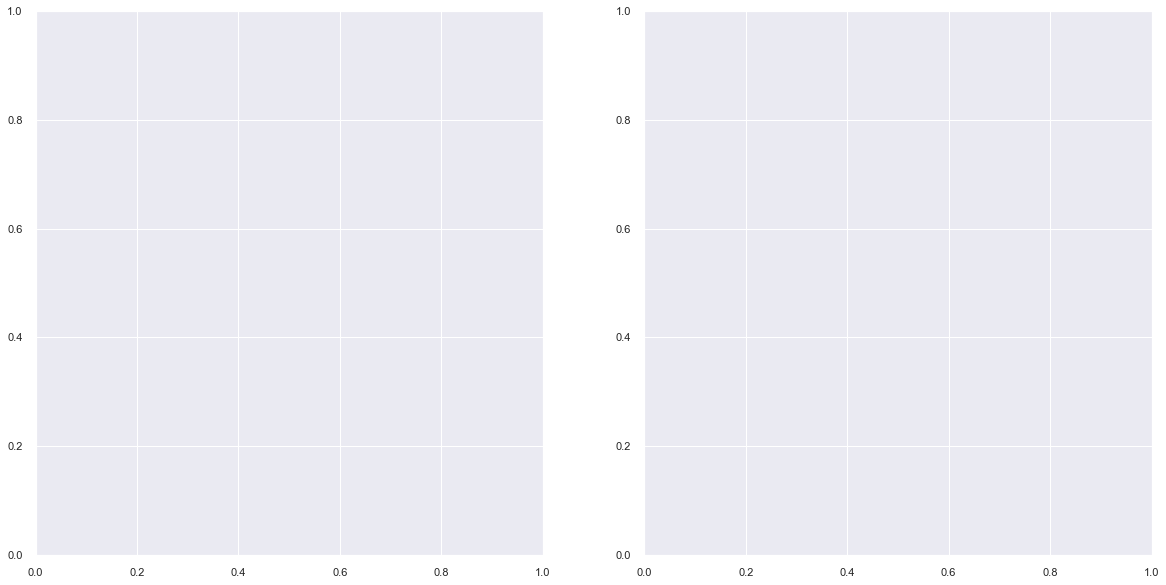

In [30]:
# ScatterPlot
# Define Plot Colours. Blue for men, pink for girls
colours = ["blue", "pink"] 

f, axes = plt.subplots(1, 2) # Allow me to generate graphs side by side
rcParams['figure.figsize'] = 20,9 # Set display size

markers = {"Male": "X", "Female" : "s"} # Set the markers to be used in the plots
sns.scatterplot(x="total_bill", y ="tip", style ="sex", hue="sex", data=tips, palette=colours, markers= markers, ax=axes[0])



# Earlier we seen that the dataset has 93 people that smoke and 151 people dont smoke. Lets view this relationship. 
markers = {"Yes": "X", "No" : "s"}# Set the markers to be used in the plots
sns.scatterplot(x="total_bill", y ="tip", style ="smoker", markers= markers, hue ="smoker",data=tips, ax=axes[1])
plt.show()

<hr>

### Swarm Plot

A swarm plot uses an algorithm that prevents the points from overlapping and adjusts the points along the categorical axis.<i>(Visualization and Python, 2019)</i> Both swarm plots that I have used will separate based on gender. We can see that that the tips between two and four are most frequent. The second swarm plot is displaying that the majority of the total bill is in the range of between 10 and 30 dollars. This is confirming what we have viewed from the scatterplots but with a much better visual representation.

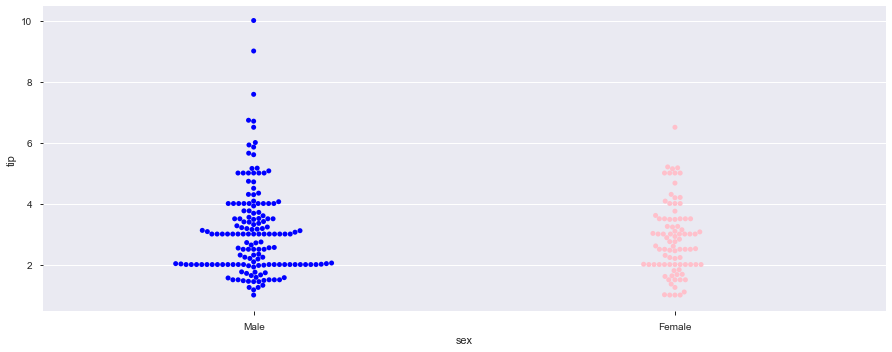

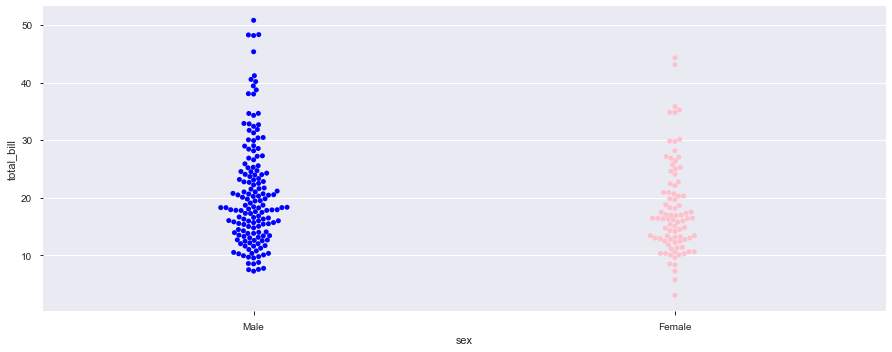

In [13]:
# Lets see the tips depending on sex 

# Define Plot Colours. Blue for men, pink for girls
colours = ["blue", "pink"] 

# Add kind to to generate the swarm plot. Height and Aspect will position accross the page
sns.catplot(x="sex", y="tip", data=tips, kind="swarm", height=5, aspect=2.5, palette=colours)
plt.show()

# Add kind to to generate the swarm plot. Height and Aspect will position accross the page
sns.catplot(x="sex", y="total_bill", data=tips, kind="swarm", height=5, aspect=2.5, palette=colours)
plt.show()

<hr>

### Violin Plot

A violin plot combines a boxplot and kernel density estimation (KDE) to provide richer description of the distribution of values. The quartile values are displayed inside the violin. We can also split the violin when the hue semantic parameter has only two levels, which could also be helpful in saving space on the plot.<i>(Visualization and Python, 2019)</i>

The violin plots I have used will display the days that people visited and what the total bill and total tips were. We can see that Friday was the quietest day and as expected Saturday and Sunday were the busiest days.

In the second and third violin plot, we investigate the distribution of the total bill and tip amount per day based on gender. Immediately we see that the largest difference in the shape of the distribution between genders happens on Fridays and overall that more men attended the restaurant. 

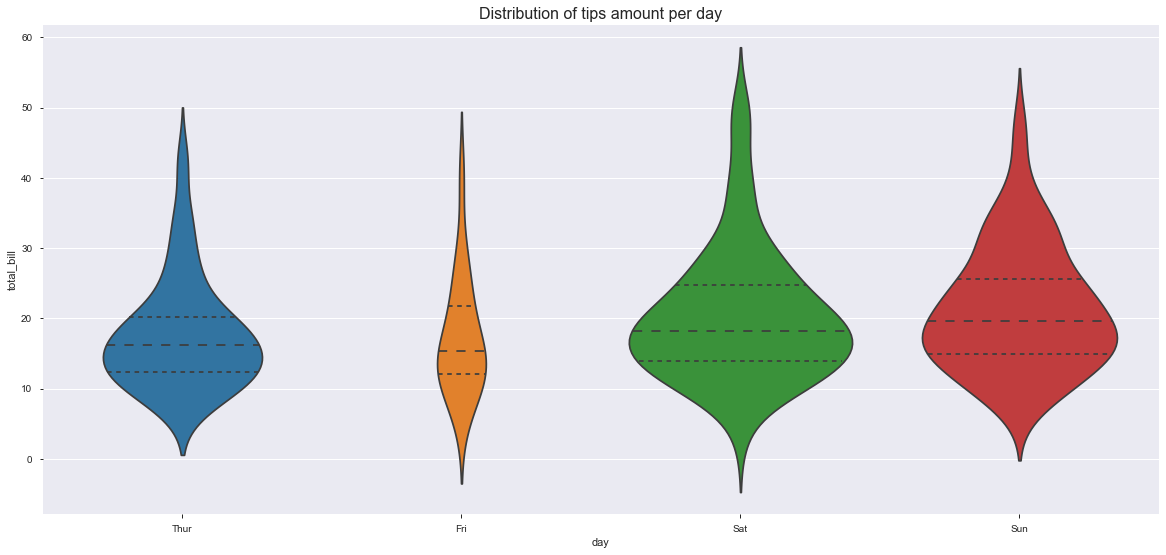

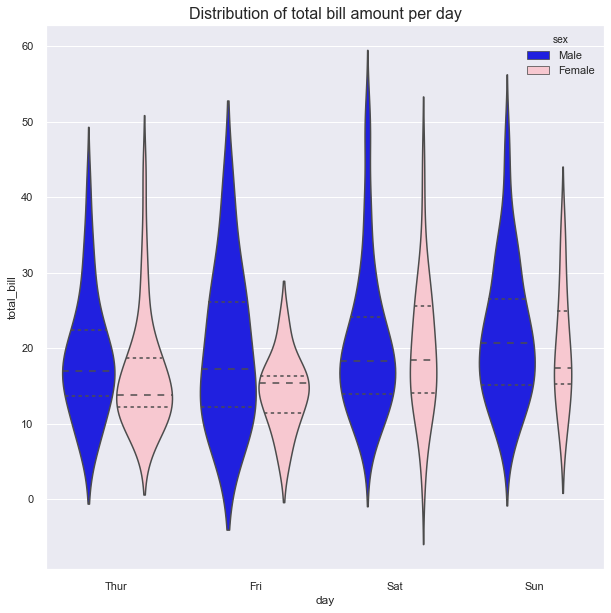

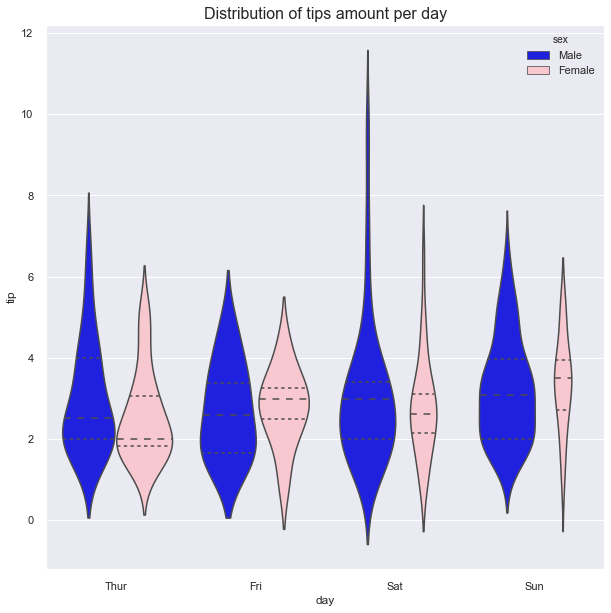

In [14]:

colours = ["blue", "pink"] # Define Plot Colours. Blue for men, pink for girls

# Lets see the tips depending on sex
# Add kind. height and aspect to position accross the page
ax = sns.violinplot(x="day", y="total_bill", kind="violin", data=tips, inner="quartile", scale="count")
# Add title to the plot and set size
ax.set_title('Distribution of tips amount per day', fontsize=16);
plt.show()

print("\n\n")


# Lets see the tips depending on sex
sns.set(rc={'figure.figsize':(10,10)}) # Set display size
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, inner="quartile", scale="count", palette=colours)
# Add title to the plot and set size
ax.set_title('Distribution of total bill amount per day', fontsize=16);
plt.show()


print("\n\n")


# Lets see the tips depending on sex
# Add kind. height and aspect to position accross the page
ax = sns.violinplot(x="day", y="tip", hue="sex",kind="violin", data=tips, inner="quartile", scale="count", palette=colours)
# Add title to the plot and set size
ax.set_title('Distribution of tips amount per day', fontsize=16);
plt.show()



<hr>

### Histogram
The histogram is very useful when we want to explore our data and give us an understanding of the distribution of the data set. We can set the bin size (by default this is set to 10). It is a good idea to change the bin size as it will output the graph in different ways and might potentially display something that is hidden. I have used bin=30 and implemented the histogram using seaborn. Seaborn uses the distplot function to create histograms.

#### 1.2 (Total_Bill)
From the total bill histograms we can see that they seem to indicate a bell shaped curve or normal distribution. The total bill variable appears skewed in nature and most of the bill values are in the range of ten to twenty dollars.

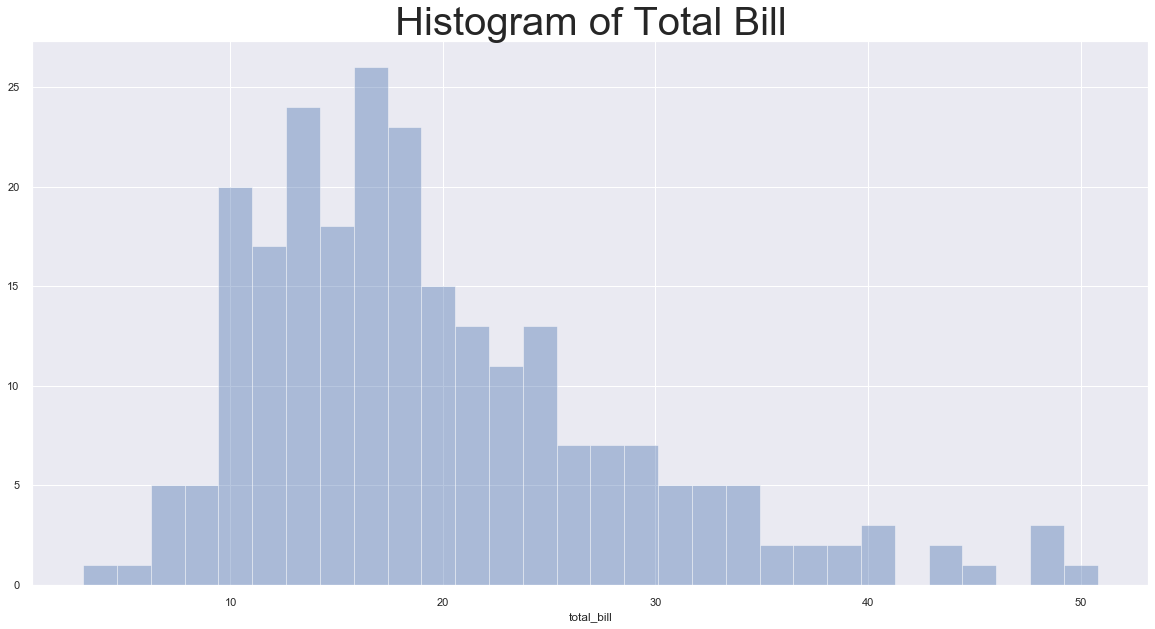

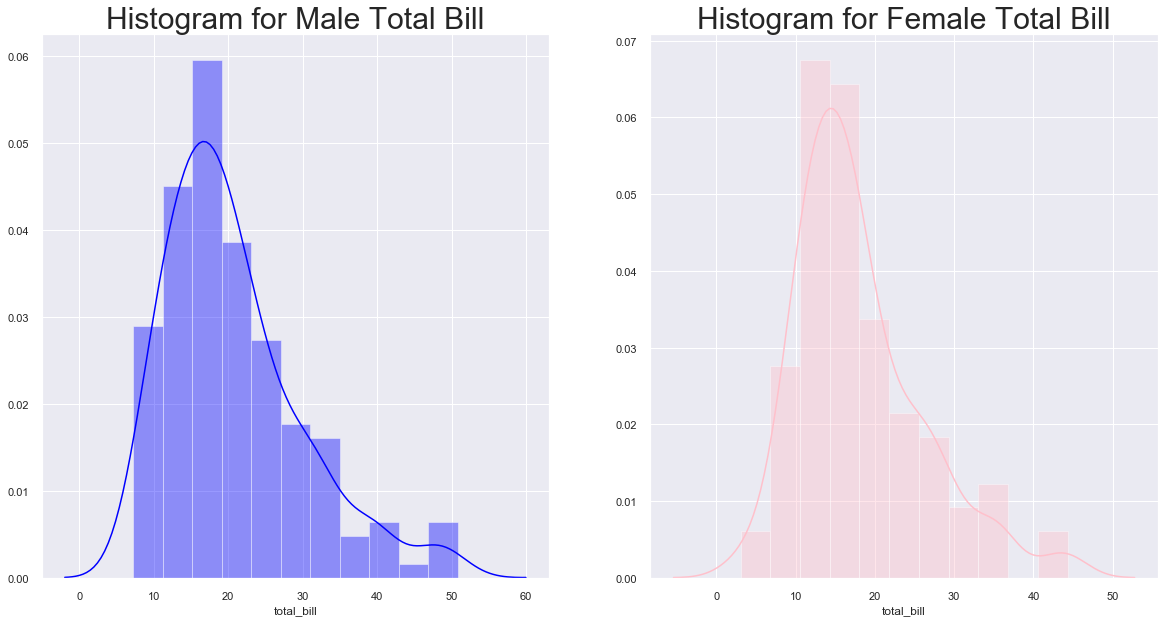

In [15]:
# Histogram, Bins allow us to view more accurate results.

# Set the size of the histogram
sns.set(rc={'figure.figsize':(20,10)})

# Disply histogram 
sns.distplot(tips['total_bill'], kde=False, bins=30).set_title("Histogram of Total Bill", fontsize=40)


# Histogram to compare Male and Female
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# https://pythonbasics.org/seaborn-distplot/
fig,axes=plt.subplots(1,2)
male = tips.loc[tips["sex"] == "Male", ["sex", "total_bill"]]
sns.distplot(male["total_bill"], color = "blue", ax=axes[0]).set_title("Histogram for Male Total Bill", fontsize=30)

female = tips.loc[tips["sex"] == "Female", ["sex", "total_bill"]]
sns.distplot(female["total_bill"], color = "pink", ax=axes[1]).set_title("Histogram for Female Total Bill", fontsize=30)
plt.show()

<hr>

#### 1.2 (Tip)

The tip variable appears skewed in nature and most of the bill values are in the range of two and four dollars. 

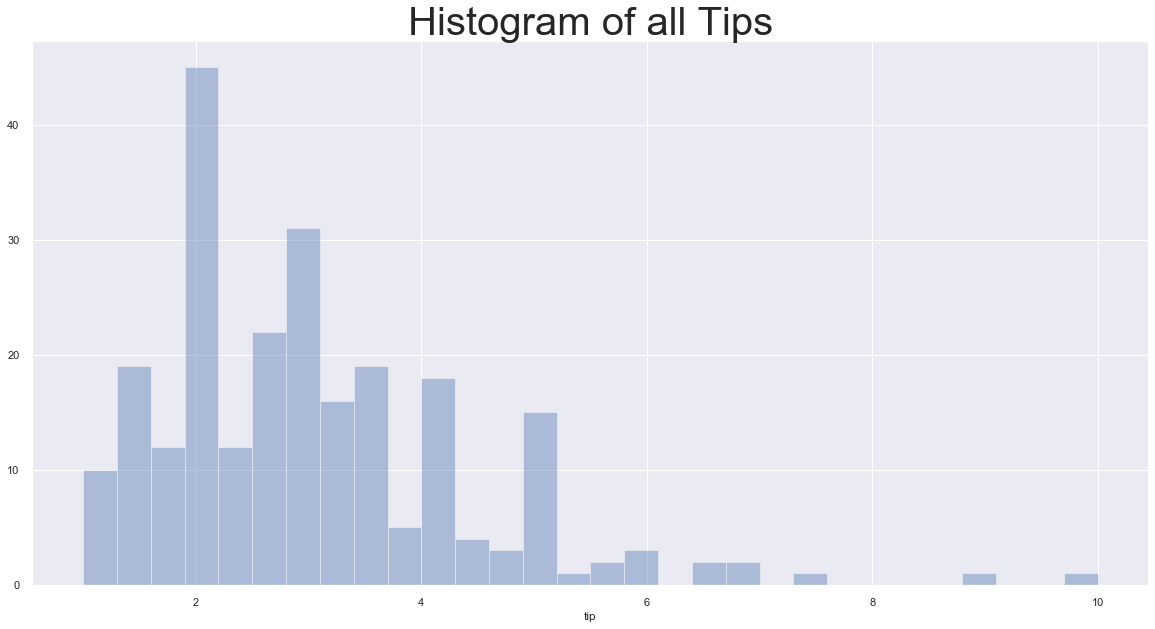

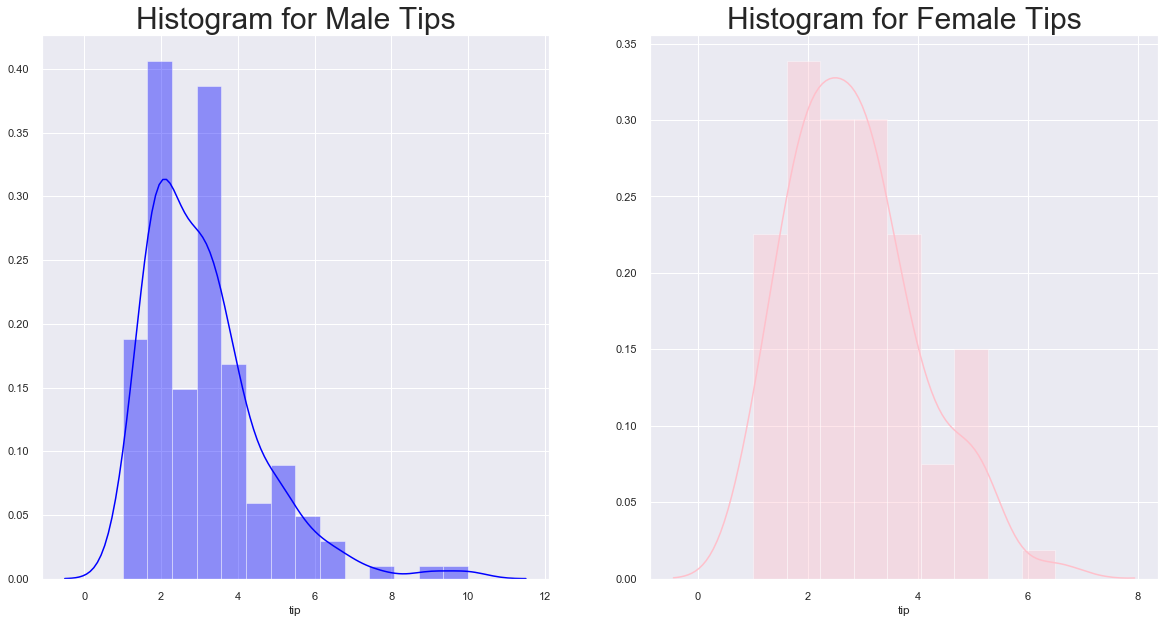

In [16]:
# Histogram, Bins allow us to view more accurate results. From the Histogram we can see that most tips are between 2 and 4 

# Set the size of the histogram
sns.set(rc={'figure.figsize':(20,10)})

# Disply histogram 
sns.distplot(tips['tip'], kde=False, bins=30).set_title("Histogram of all Tips", fontsize=40)


# Histogram to compare Male and Female
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# https://pythonbasics.org/seaborn-distplot/

fig,axes=plt.subplots(1,2) # Used to place graps side by side
male = tips.loc[tips["sex"] == "Male", ["tip"]] # Pull the columns required related to male gender
sns.distplot(male["tip"], color = "blue", ax=axes[0]).set_title("Histogram for Male Tips", fontsize=30)

female = tips.loc[tips["sex"] == "Female", ["tip"]] # Pull the columns required related to male gender
sns.distplot(female["tip"], color = "pink", ax=axes[1]) .set_title("Histogram for Female Tips", fontsize=30)
plt.show()

<hr>

## Break the Dataset representing the different days
###  linear relationships using regplot and lmplot
The Two main features in Seaborn to visualize the linear relationships determined by regression are regplot() and lmplot() and are closely related and share most of the core functionality. However, it's important to understand how they are different. The two functions plot a scatter plot of two variables x and y, then fit the regression model y~x and plot the regression line and 95% confidence interval for the regression line. <i>(Tutorialspoint.com, 2019)</i>

How the relationship changes between these two variables change when we add a third variable is the difference between regplot() and lmplot(). regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide a simple interface that displays linear regression. According to (Tutorialspoint.com, 2019), "The FacetGrid class helps in visualizing the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels."

In this section I will be looking at how the total bill affects tip. Y will be the independent and X will be the dependent. I will be specifying a hue so the output will display one and two regressions in the scatter plots. When implementing the lmplot this will display four plots in total, this is great for doing multiple regressions and analysis across many categorical data points and trying to find relationships. 

<hr>

### Thursday:

The first day to investigate is Thursday and we can see from the scatter plot that just like my results earlier showing that most tips are within the range of two and four dollars. It is interesting to note that they one had one booking of two for dinner. More data would need to be collected to see if this is a regular occurrence because it would bot be cost effective paying bills and wages if they are not popular during dinner time. 

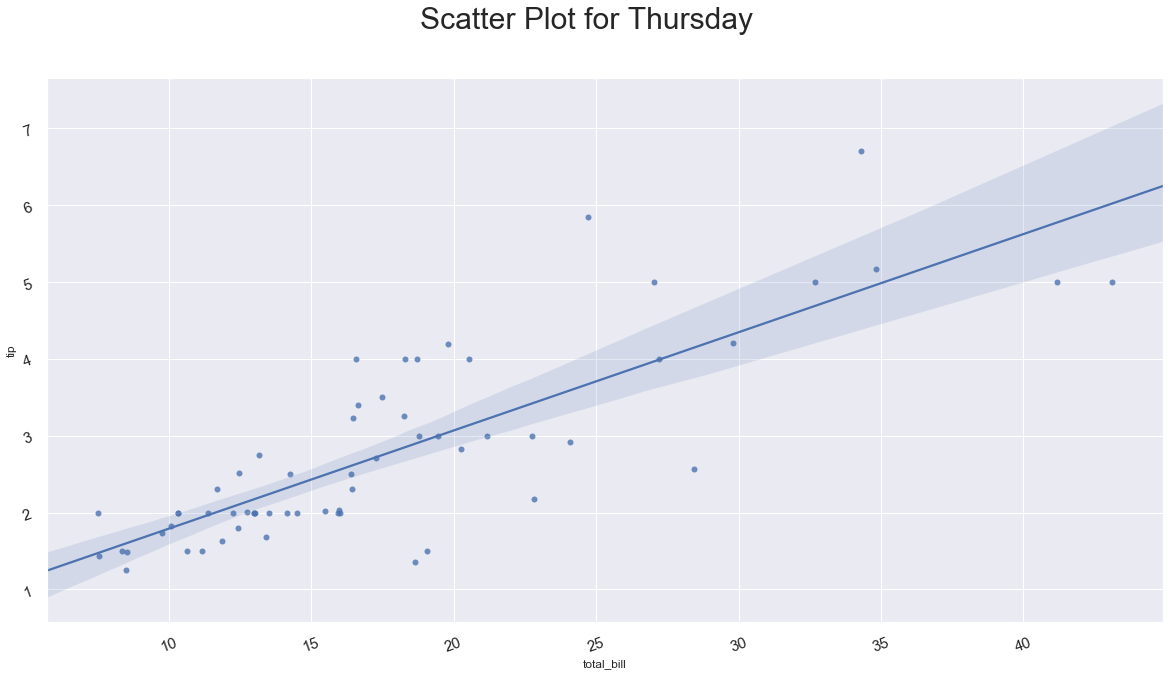

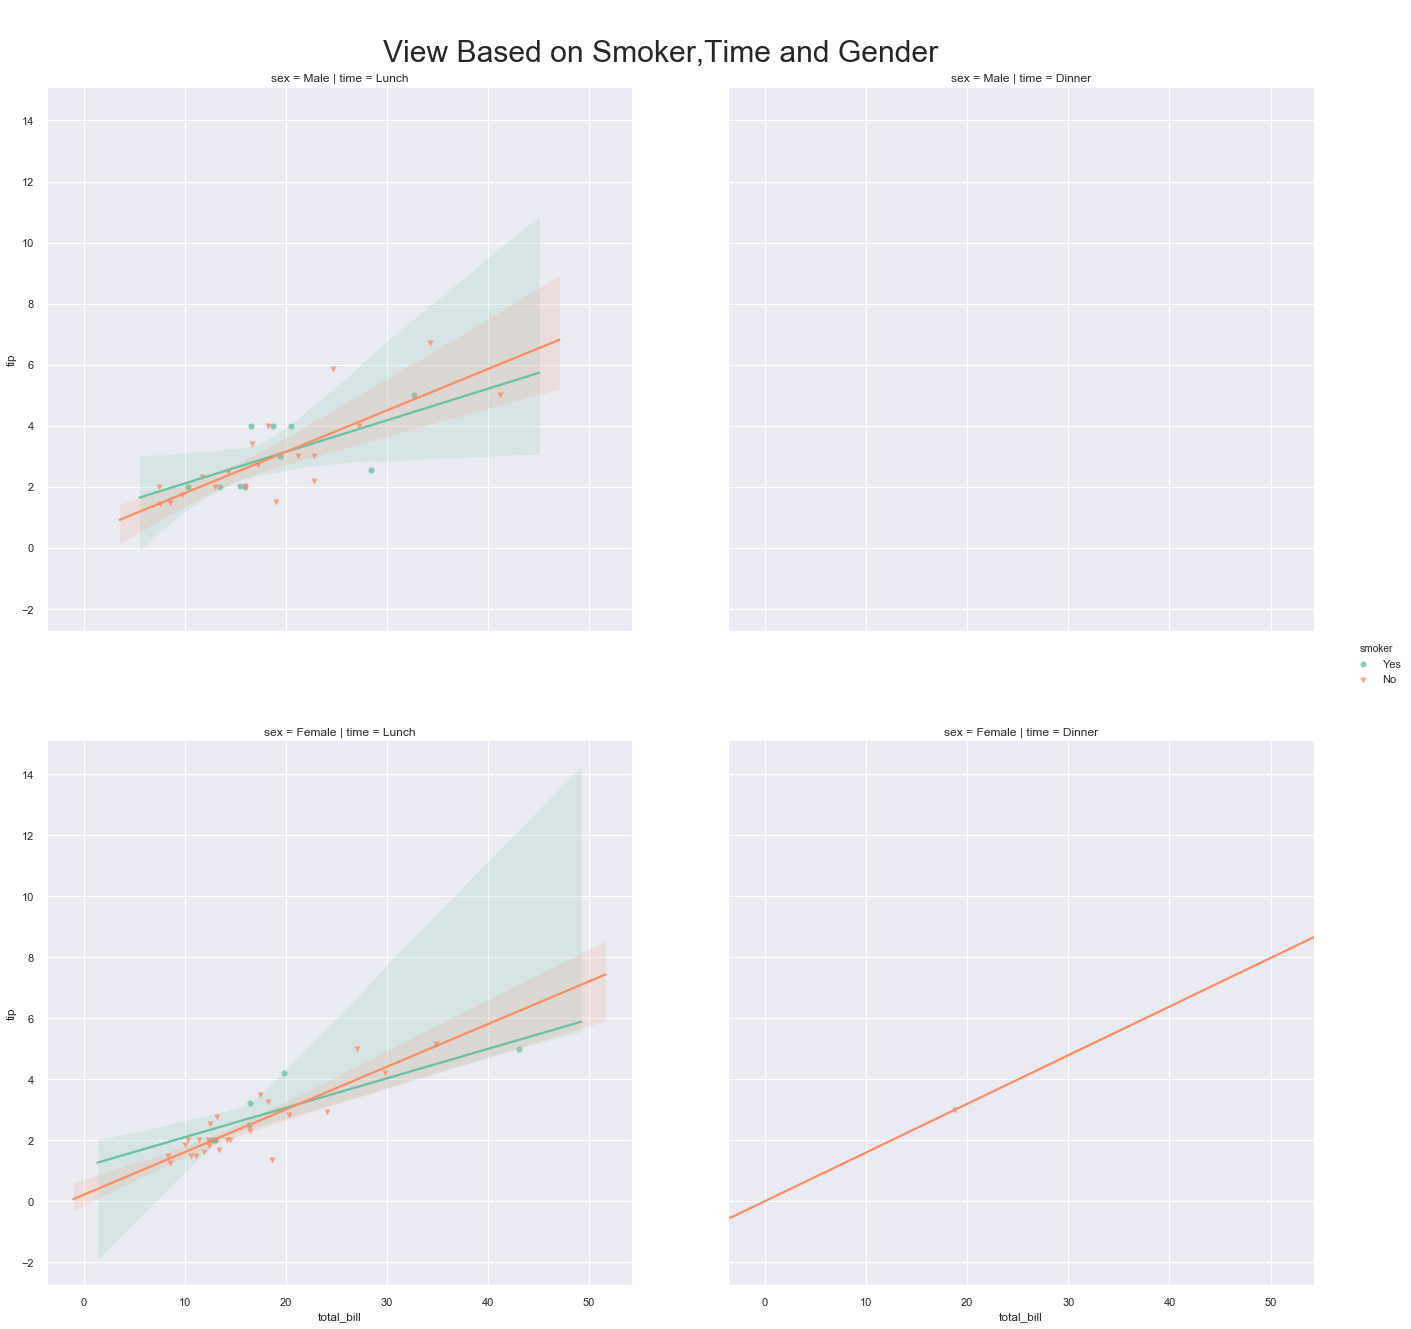

In [17]:
# Pull data on different days, plot one by one and investigate
thur = tips [tips ['day'] == "Thur"]

# Plot regplot for Thursday

plt.suptitle("Scatter Plot for Thursday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = thur.iloc[:,1] # Use Column 1 (tip)
y1 = thur.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
thursday = sns.regplot(y1,x1)



# linear relationship as determined using lmplot

# lmplot to view data on thursday based on smoker and time and row
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=thur, col="time", row ="sex" ,palette="Set2", height=10, 
           aspect=1, markers=["o","v"]).fig.suptitle("\nView Based on Smoker,Time and Gender", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [18]:
# Double check that dinner booking of 1 is correct
print(thur.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size             1     2    3    4    5    6
sex    time                                 
Male   Lunch   0.0  24.0  2.0  2.0  1.0  1.0
Female Lunch   1.0  23.0  2.0  3.0  0.0  2.0
       Dinner  0.0   1.0  0.0  0.0  0.0  0.0


<hr>

### Friday :

The second day to investigate is Friday and we can see from the scatter plot Friday is a busier day with both lunch and dinner.

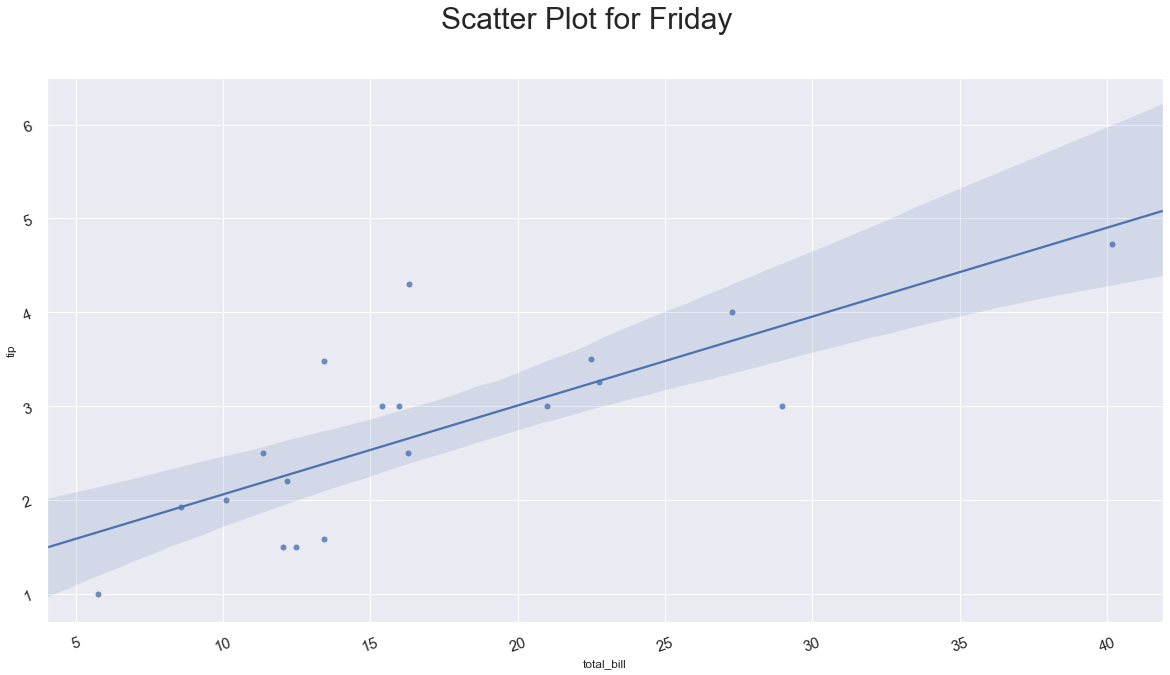

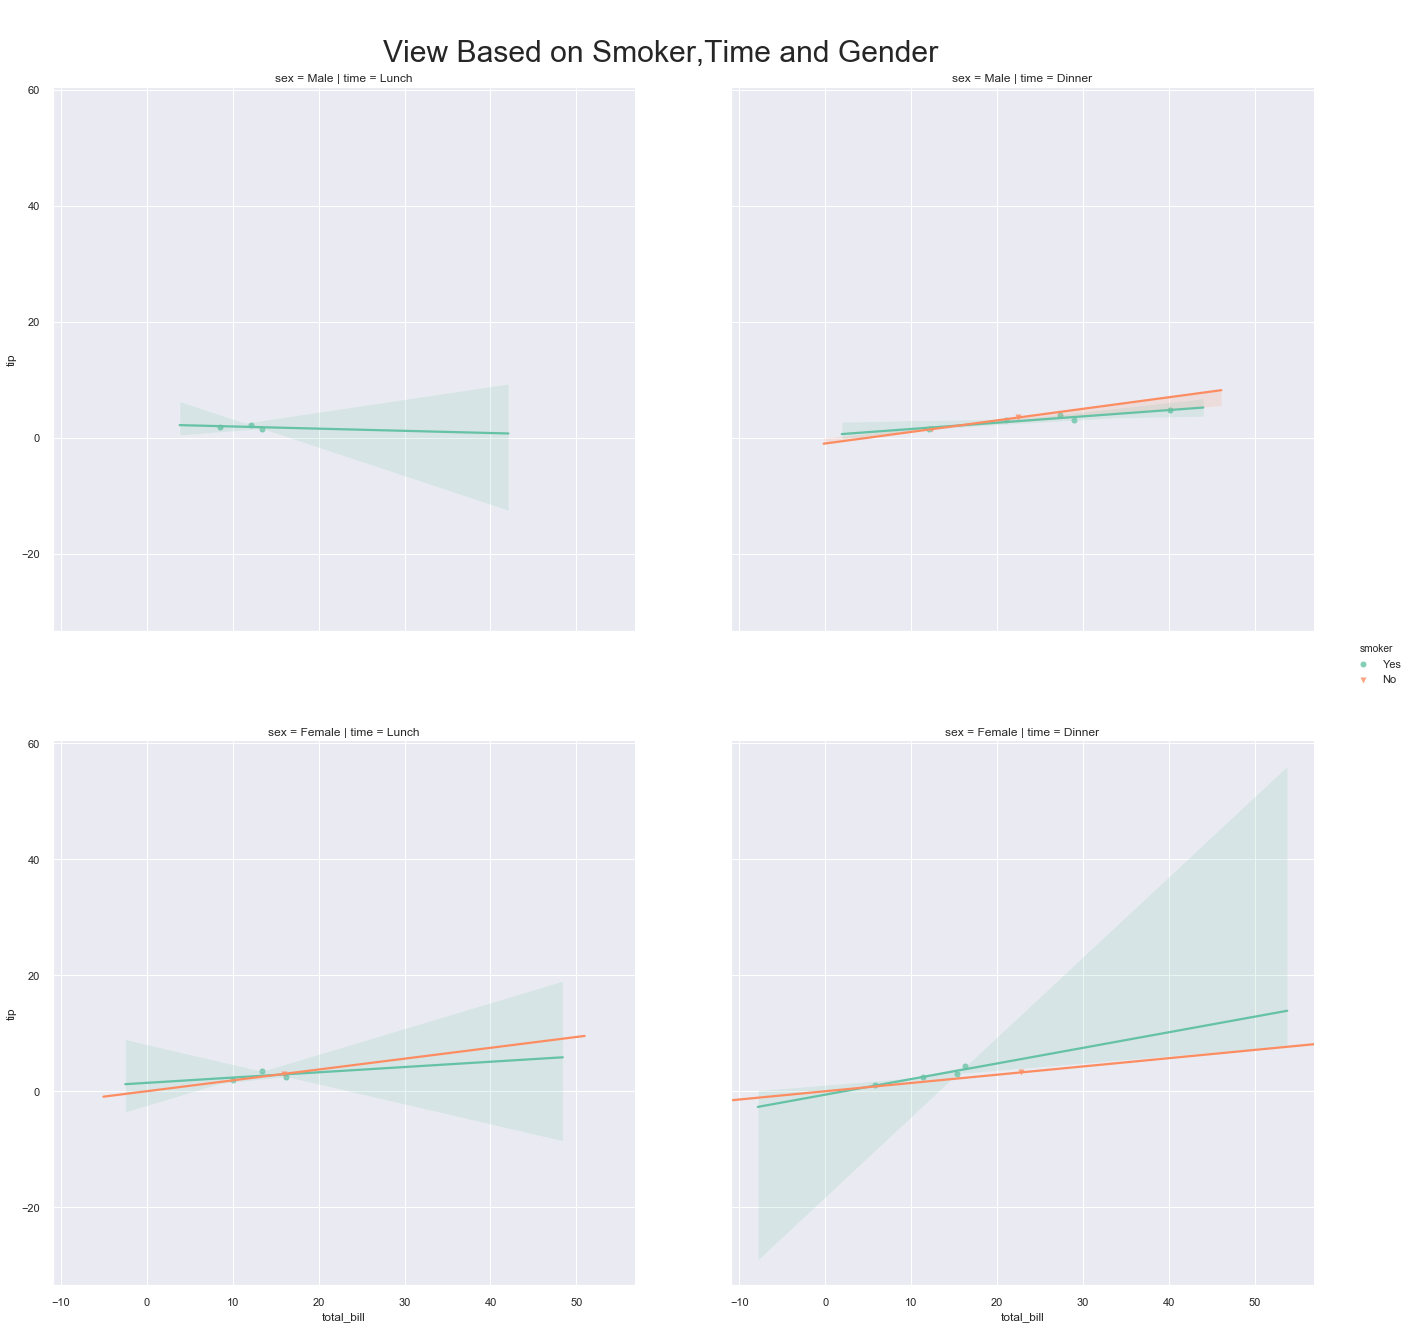

In [19]:
# Pull data on different days, plot one by one and investigate
fri = tips [tips ['day'] == "Fri"]

# Plot Friday

plt.suptitle("Scatter Plot for Friday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)   
plt.yticks(fontsize=15, rotation=20)

x1 = fri.iloc[:,1] # Use Column 1 (tip)
y1 = fri.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
friday = sns.regplot(y1,x1)



# Linear regression using lmplot

# lmplot to view data on thursday based on smoker and time and row
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=fri, col="time", row ="sex" ,palette="Set2", height=10, 
           aspect=1, markers=["o","v"]).fig.suptitle("\nView Based on Smoker,Time and Gender", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [20]:
# View the party sizes
print(fri.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size             1    2    3    4
sex    time                      
Male   Lunch   1.0  2.0  0.0  0.0
       Dinner  0.0  6.0  0.0  1.0
Female Lunch   0.0  3.0  1.0  0.0
       Dinner  0.0  5.0  0.0  0.0


<hr>

### Saturday :

The third day to investigate is Saturday and we can see from the scatter plot that Saturday is the busiest day data was collected. It is interesting to note that nothing was recorded for lunch. Would this indicate that the restaurant is closed during lunch on a Saturday?, or was the staff member collecting the data working during the evening as it is possible that they might stay open late on a Saturday.

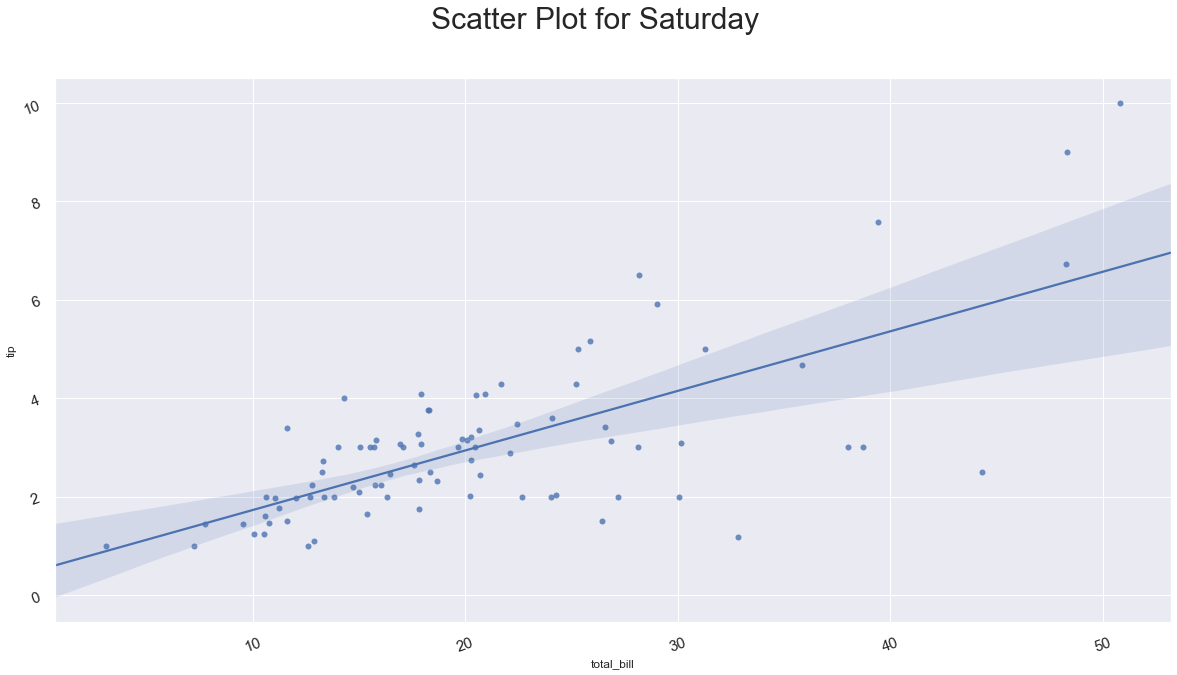

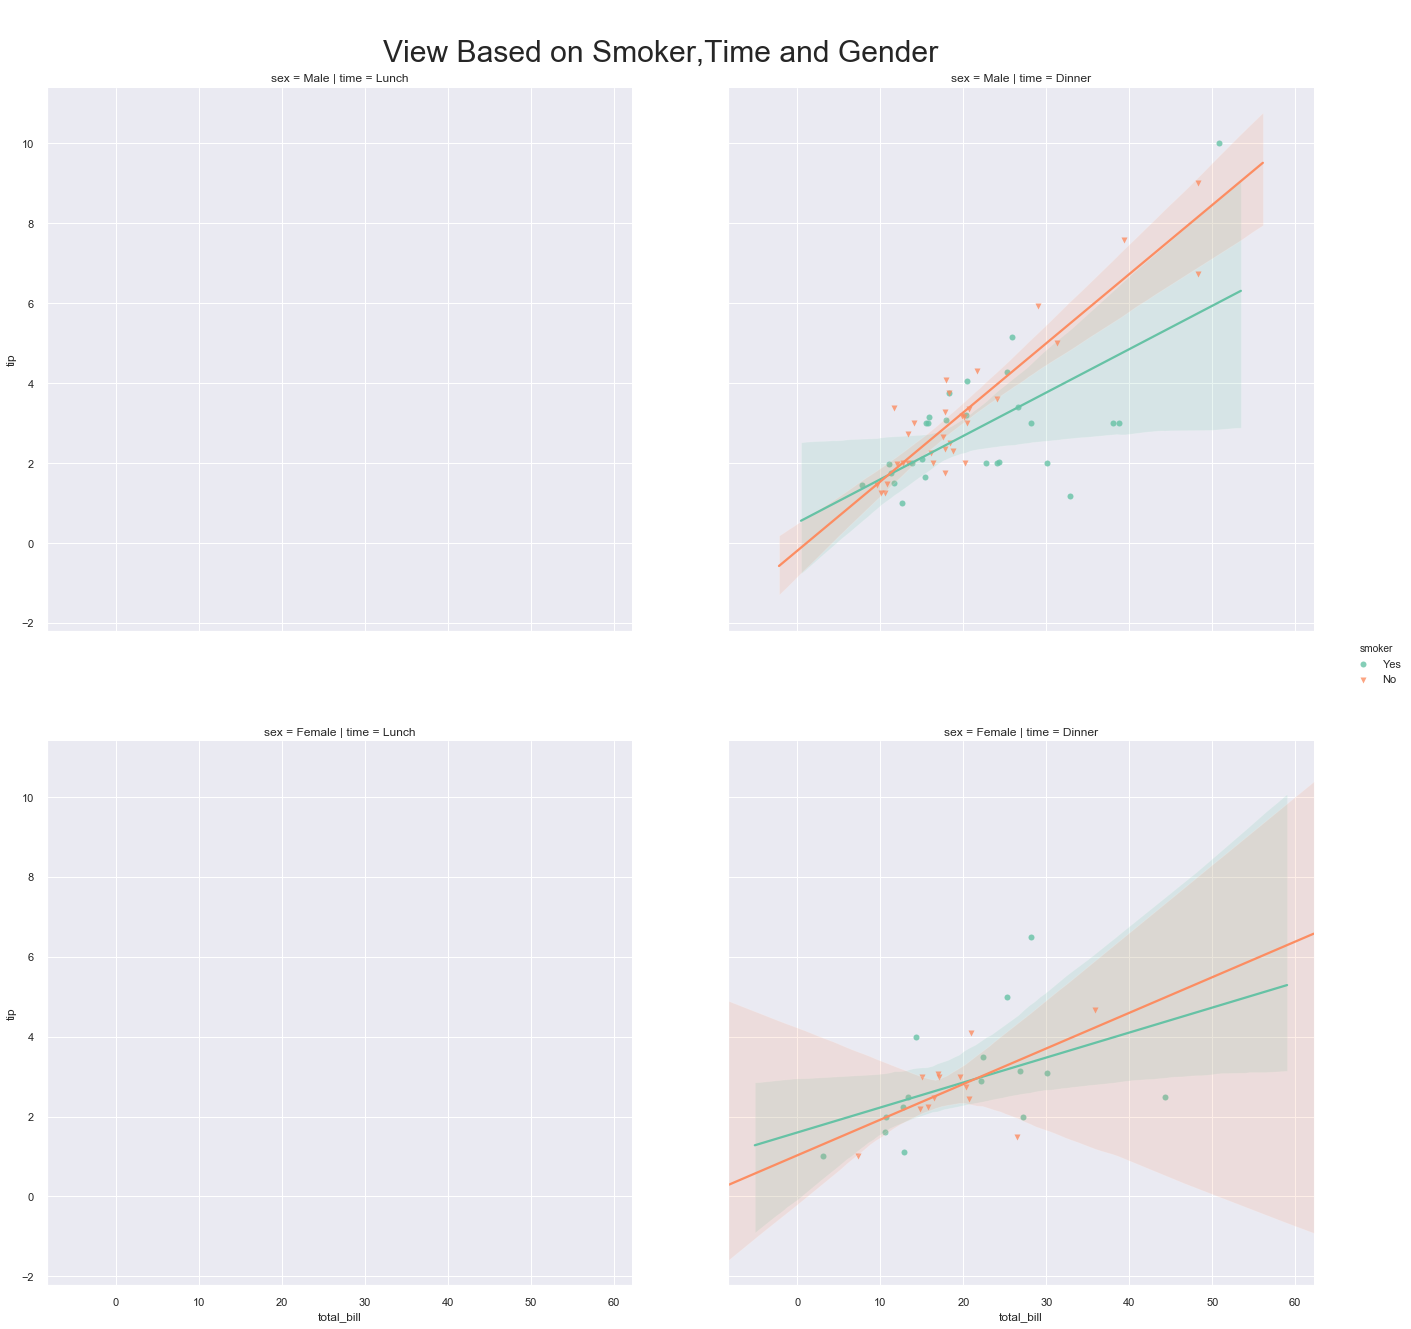

In [21]:
# Pull data on different days, plot one by one and investigate
sat = tips [tips ['day'] == "Sat"]

# Plot Saturday

plt.suptitle("Scatter Plot for Saturday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = sat.iloc[:,1] # Use Column 1 (tip)
y1 = sat.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
saturday = sns.regplot(y1,x1)



##inear regression using lmplot

# lmplot to view data on thursday based on smoker and time and row
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=sat, col="time", row ="sex" ,palette="Set2", height=10, 
           aspect=1, markers=["o","v"]).fig.suptitle("\nView Based on Smoker,Time and Gender", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [22]:
# Group by saturday
print(sat.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))


size             1     2     3     4    5
sex    time                              
Male   Dinner  0.0  34.0  13.0  11.0  1.0
Female Dinner  2.0  19.0   5.0   2.0  0.0


<hr>

### Sunday : 

The fourth day to investigate is Sunday and we can see from the scatter plot that Sunday is the second busiest day data was collected. It is interesting to note that again, like Saturday, nothing was recorded for lunch. The overall tips received on Sunday is scattered and has no clear relationship to the amount received as total bill. 

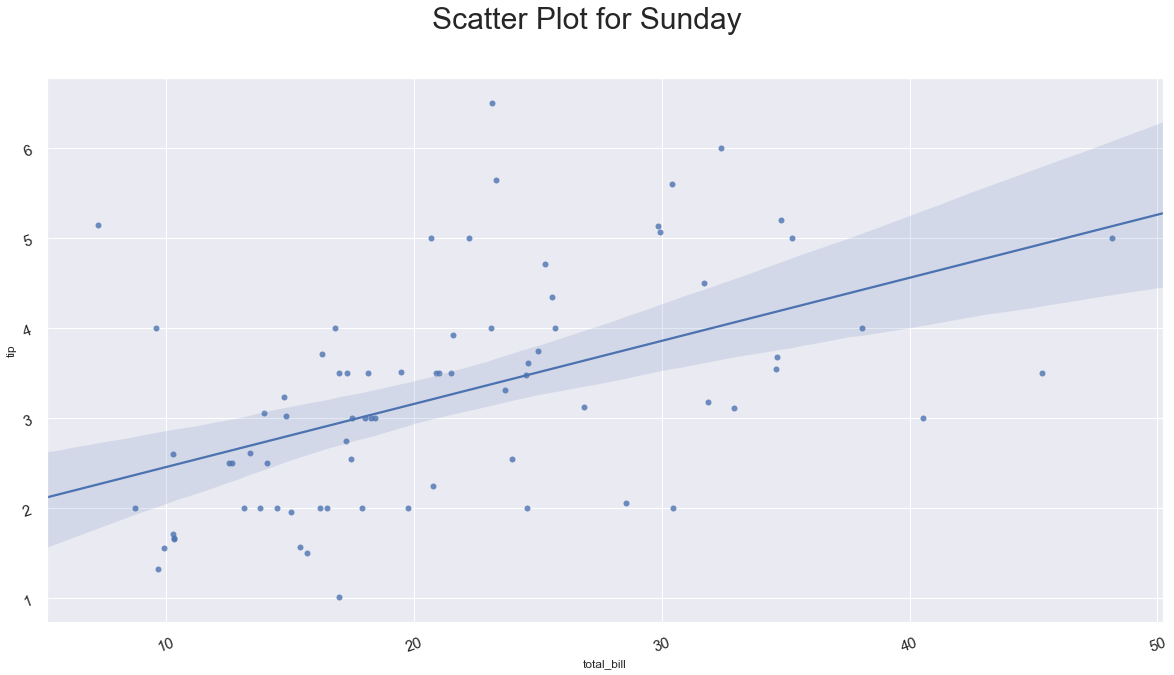

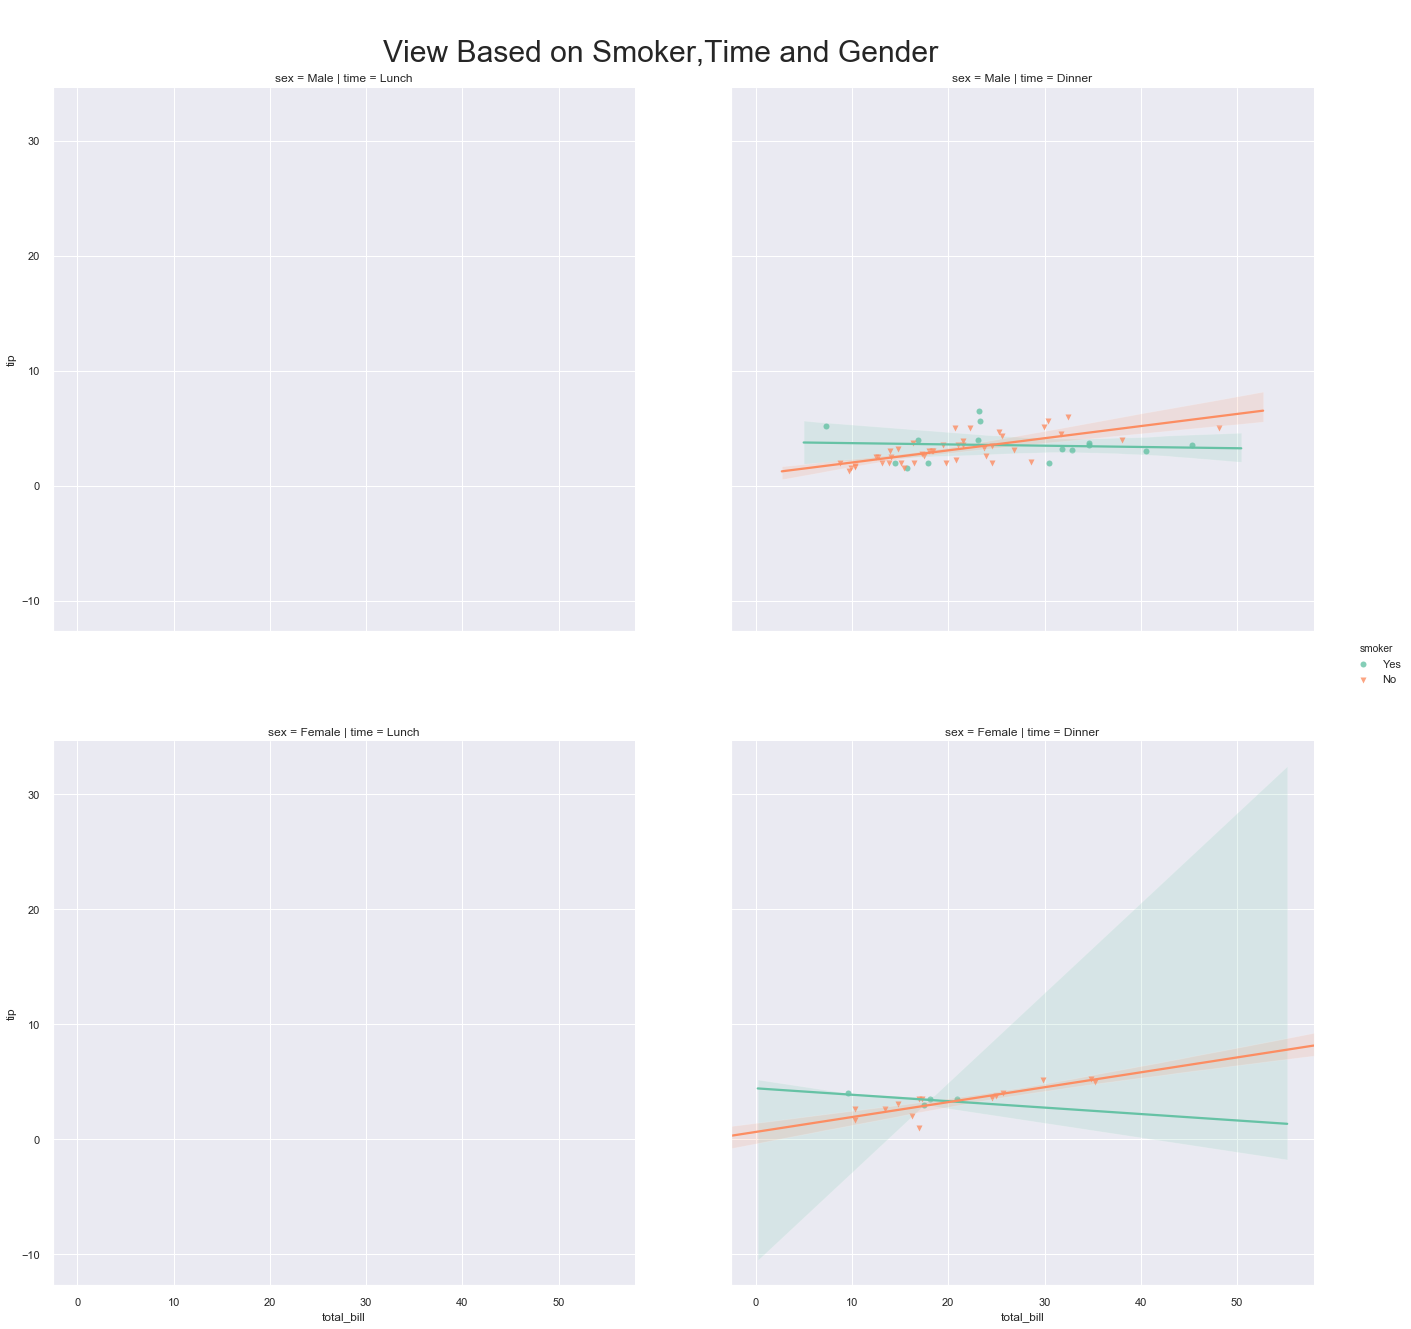

In [23]:
# Pull data on different days, plot one by one and investigate
sun = tips [tips ['day'] == "Sun"]

# Plot Sunday

plt.suptitle("Scatter Plot for Sunday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = sun.iloc[:,1] # Use Column 1 (tip)
y1 = sun.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
sunday = sns.regplot(y1,x1)



## Linear regression using lmplot

# lmplot to view data on thursday based on smoker and time and row
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=sun, col="time", row ="sex" ,palette="Set2", height=10, 
           aspect=1, markers =["o", "v"]).fig.suptitle("\nView Based on Smoker,Time and Gender", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [24]:
# Group by Sunday
print(sun.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))


size              2    3     4    5    6
sex    time                             
Male   Dinner  32.0  9.0  14.0  2.0  1.0
Female Dinner   7.0  6.0   4.0  1.0  0.0


## Testing Models

The mean square error (MSE) always a positive number that what will evaluate the algorithm as it will generate an idea of how incorrect the predictions are. The ideal MSE is not zero, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data. The MSE will basically check what the difference is between the actual value and the predicted value. (Agrimetsoft.com, 2019)

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.(The Balance Small Business, 2019)

### Assign and Train

In this section I have assigned X and Y columns from the dataset and split the dataset 70:30. I have specified a random seed of 26 and what this will do is sets a seed to the random generator. I have specified a test_size of 0.30 and this boolean should be between 0.0 and 1.0, it represents the proportion I want to include in the train split which in this case is 30 percent. 

In this dataset we have string entries that represent gender for example, we first must change these to numbers so the computer can understand. To complete this I have used a replace, this will convert strings to numbers and once completed I have displayed the head as output to demonstrate what was changed.

In [25]:
# Replace strings with numbers 
tips.replace({ 'sex': {'Male':0 , 'Female':1} ,'day': {'Thur':1 , 'Fri':2, 'Sat' :3, 'Sun' :4} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
# Show head to see not format.
print(tips.head())

''' Assign columns to X and Y '''
X = tips[['sex','smoker','size']]
Y = tips[['tip']]


'''Split data into training and test data and Print to screen if split completed'''
# random_state sets a seed to the random generator
# test_size should be between 0.0 and 1.0 and will represent the proportion I want to include in the train split.
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.30,random_state=26)
print("Training and testing split was successful.\n")

   total_bill   tip  sex  smoker  day    time  size
0       16.99  1.01    1       0    4  Dinner     2
1       10.34  1.66    0       0    4  Dinner     3
2       21.01  3.50    0       0    4  Dinner     3
3       23.68  3.31    0       0    4  Dinner     2
4       24.59  3.61    1       0    4  Dinner     4
Training and testing split was successful.



### Build Model

In statistics, linear regression is a very commonly used type of predictive analysis. The idea of regression is where we want to examine relationships between two or more variables. One variable is the independent variable while the other variable would be a dependent variable and searches for a statistical relationship but not deterministic relationship. The idea of linear regression is to use data to build a model used to predict future data. The predicted data is called the target, and the data used to make predictions are called the features.(The Balance Small Business, 2019)

We can see from the output that by using a Linear Regression model the returning mean squared error is 0.74 which is very good. We want this number as low as possible. The r2 that was calculated for the model is 0.2 which is not a very good result as 20% of the model can be explained by the inputs. I have also outputted the predicted prices.<i>(Pandas.pydata.org, 2019)</i>

In [26]:
from sklearn.metrics import mean_squared_error

# Use all 13 predictors to fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

predictions=linear_model.predict(X_test) # Store predict in variable

# make predictions using the model
print("Mean Square Error : {}".format(round(mean_squared_error(Y_test, predictions), 2)))

# Find and print R-Squared (Rounded to 3 decimal places)
print("R-Squared         : {}".format(round(linear_model.score(X_train,Y_train),2)))


Mean Square Error : 0.74
R-Squared         : 0.2


In [27]:
# Predict house prices.
print("Predicted prices\n", predictions)

Predicted prices
 [[2.56272668]
 [1.83537946]
 [2.56272668]
 [4.07266752]
 [5.47211556]
 [4.30318399]
 [3.3453203 ]
 [2.84848954]
 [2.61797308]
 [3.3453203 ]
 [2.61797308]
 [2.84848954]
 [2.84848954]
 [4.07266752]
 [4.07266752]
 [2.61797308]
 [2.61797308]
 [3.3453203 ]
 [4.30318399]
 [2.84848954]
 [2.61797308]
 [2.56272668]
 [2.84848954]
 [3.3453203 ]
 [3.2900739 ]
 [3.57583676]
 [5.52736197]
 [2.61797308]
 [2.61797308]
 [2.56272668]
 [4.07266752]
 [3.57583676]
 [3.57583676]
 [2.79324314]
 [3.3453203 ]
 [2.61797308]
 [2.84848954]
 [2.06589592]
 [3.2900739 ]
 [2.79324314]
 [2.61797308]
 [4.80001474]
 [2.12114232]
 [2.84848954]
 [2.79324314]
 [2.56272668]
 [2.61797308]
 [2.56272668]
 [2.84848954]
 [2.84848954]
 [2.61797308]
 [2.79324314]
 [2.61797308]
 [2.56272668]
 [2.79324314]
 [4.80001474]
 [2.79324314]
 [3.52059036]
 [2.79324314]
 [2.56272668]
 [2.56272668]
 [3.3453203 ]
 [2.56272668]
 [2.61797308]
 [2.56272668]
 [2.79324314]
 [3.2900739 ]
 [2.61797308]
 [4.74476834]
 [2.84848954]
 [

AxesSubplot(0.125,0.125;0.775x0.755)


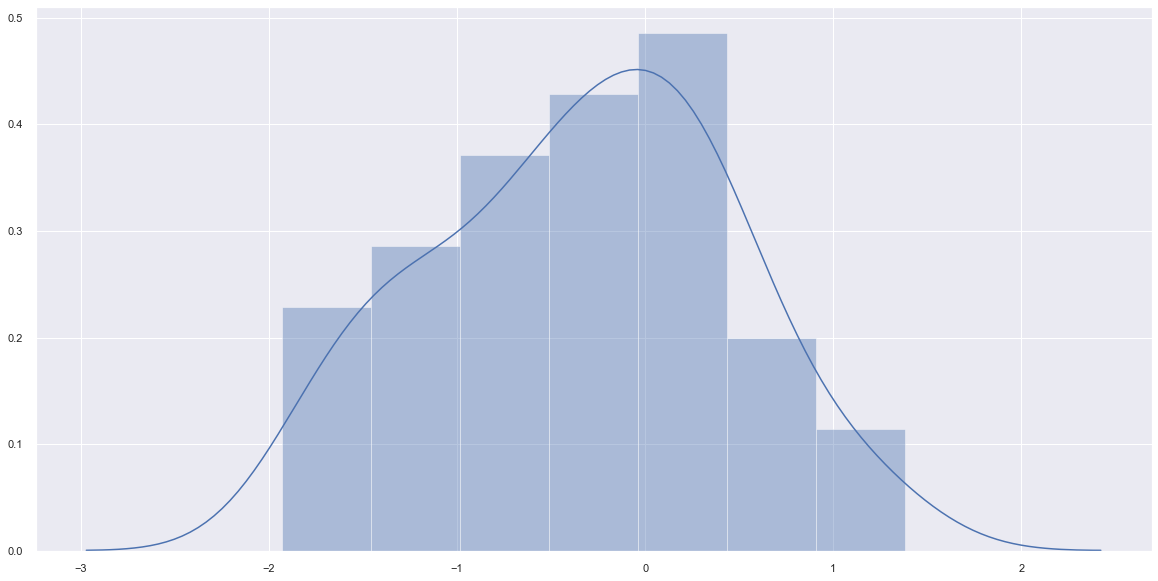

In [28]:
print(sns.distplot(Y_test-predictions))

In [ ]:
print(knn.score(X_test, Y_test))